# CS418 Data Pirates

Is there a connection between the increasing poverty gap and the changing crime landscape in Chicago?

Datasets used:
* Chicago Crime, 2001 to present
* Selected socioeconomic indicators in Chicago, 2008 to 2012


The hardship index is a score that incorporates each of the six selected socioeconomic indicators according to the method described in An Update on Urban Hardship

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

## Socioeconomic gaps
The "Selected socioeconomic indicators in Chicago, 2008 to 2012" dataset looks into
* Poverty level
* Crowded housing
* % of High school graduates
* Per capita income

In [225]:
socioecon = pd.read_csv("ChicagoSocioecon.csv")
socioecon['Community Area Number'] = pd.to_numeric( socioecon['Community Area Number'], downcast='signed')
socioecon['Community Area Number'] = socioecon['Community Area Number'].fillna(0.0).apply(np.int64)
socioecon = socioecon.set_index('Community Area Number')
socioecon.head()
# socioecon.sort_values(by=['HARDSHIP INDEX'])
# plot = sns.lineplot(x="Community Area Number", y="PER CAPITA INCOME ", data=socioecon
# plot.set_title("Per Capita Income among various Chicago community areas")

,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
Community Area Number,,,,,,,,
1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


## Chicago Crimes

Text(0.5, 1.0, 'Crime count among Chicago community areas')

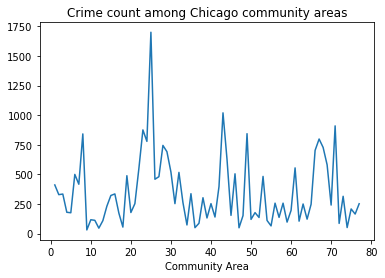

In [247]:
crimes = pd.read_csv("ChicagoCrimes.csv")
crime = pd.DataFrame( crimes.groupby('Community Area').count()['ID'])

plot = sns.lineplot(data=crime, legend=False)
plot.set_title("Crime count among Chicago community areas")

## Visualizations

In [204]:
# Data Cleaning [Chicago Maps]
chicago_map = gpd.read_file("geo_export_7740d8e1-a704-49b1-8276-e70c37a786a0.shp")
chicago_map['Community Area Number'] = pd.to_numeric(chicago_map['area_num_1'], downcast='signed')
chicago_map = chicago_map.drop(['comarea', 'comarea_id', 'perimeter', 'area', 'area_numbe', 'area_num_1'], axis=1)
chicago_map = chicago_map.set_index('Community Area Number').sort_values(by="Community Area Number")
chicago_map.head()

,community,shape_area,shape_len,geometry
Community Area Number,,,,
1,ROGERS PARK,5.125990e+07,34052.397576,POLYGON ((-87.65455590025104 41.99816614970252...
2,WEST RIDGE,9.842909e+07,43020.689458,"POLYGON ((-87.6846530946559 42.0194847726953, ..."
3,UPTOWN,6.509564e+07,46972.794555,POLYGON ((-87.64102430213292 41.95480280553257...
4,LINCOLN SQUARE,7.135233e+07,36624.603085,"POLYGON ((-87.6744075678037 41.97610340441675,..."
5,NORTH CENTER,5.705417e+07,31391.669754,"POLYGON ((-87.67336415409336 41.9323427446535,..."


### [VIZ1] Income Map

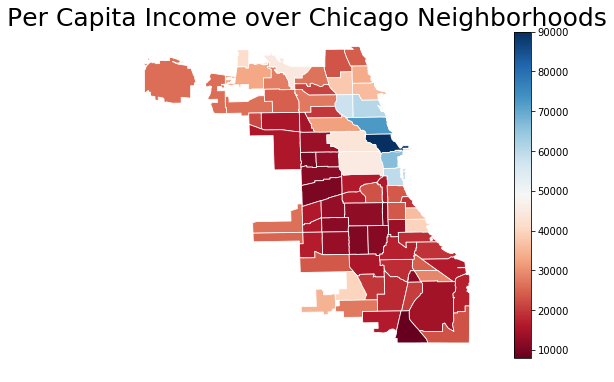

In [208]:
## INCOME MAP ##
socioecon_map = chicago_map.join(socioecon, on='Community Area Number')

variable = "PER CAPITA INCOME "
fig, ax = plt.subplots(1, figsize=(10, 6))
vmin, vmax = 8000, 90000

socioecon_map.plot(column=variable, cmap="RdBu", linewidth=0.8, ax=ax, edgecolor='1')
ax.set_title("Per Capita Income over Chicago Neighborhoods", fontdict={"fontsize": 25, "fontweight" : 5})
ax.axis('off')

# Legend 
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

### [VIZ2] Unemployment Rate Map

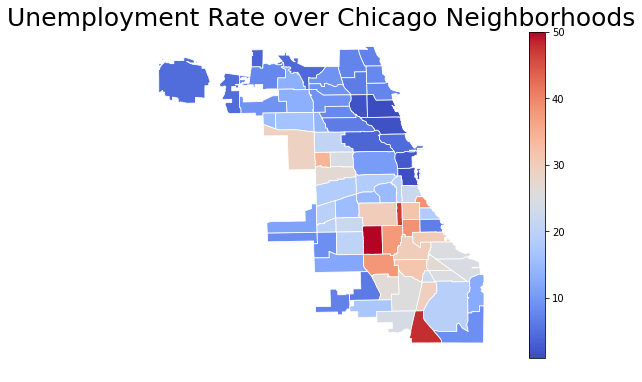

In [209]:
## UNEMPLOYMENT RATE ##

variable = "PERCENT AGED 16+ UNEMPLOYED"
fig, ax = plt.subplots(1, figsize=(10, 6))
vmin, vmax = 1, 50

socioecon_map.plot(column=variable, cmap="coolwarm", linewidth=0.8, ax=ax, edgecolor='1')
ax.set_title("Unemployment Rate over Chicago Neighborhoods", fontdict={"fontsize": 25, "fontweight" : 5})
ax.axis('off')

#Legend 
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

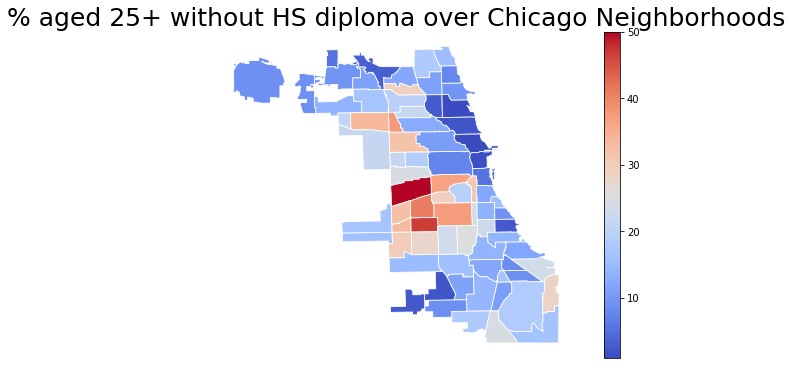

In [250]:
## EDUCATION ##

variable = "PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA"
fig, ax = plt.subplots(1, figsize=(10, 6))
vmin, vmax = 1, 50

socioecon_map.plot(column=variable, cmap="coolwarm", linewidth=0.8, ax=ax, edgecolor='1')
ax.set_title("% aged 25+ without HS diploma over Chicago Neighborhoods", fontdict={"fontsize": 25, "fontweight" : 5})
ax.axis('off')

#Legend 
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

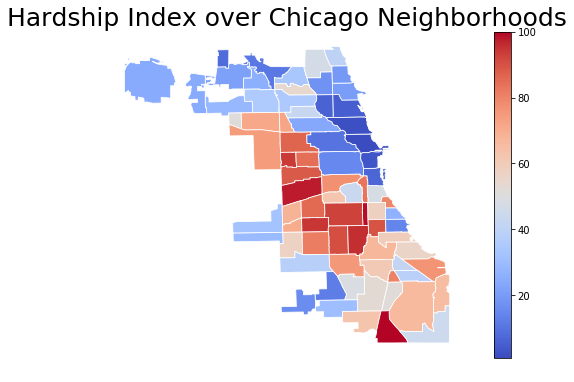

In [163]:
## HARDSHIP INDEX ##

variable = "HARDSHIP INDEX"
fig, ax = plt.subplots(1, figsize=(10, 6))
vmin, vmax = 1, 100

income_map.plot(column=variable, cmap="coolwarm", linewidth=0.8, ax=ax, edgecolor='1')
ax.set_title("Hardship Index over Chicago Neighborhoods", fontdict={"fontsize": 25, "fontweight" : 5})
ax.axis('off')

#Legend 
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)